# Flood Datasets Metadata Analysis
Author: Mark Bauer

### Goal: To examine metadata (e.g. download count, page views, etc.) about datasets related to flooding on NYC Open Data.

# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime, timezone
import requests

Documention for installing watermark: https://github.com/rasbt/watermark.

In [2]:
# reproducibility
%reload_ext watermark
%watermark -t -d -v -p pandas,numpy,matplotlib,seaborn,requests

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

pandas    : 1.5.1
numpy     : 1.23.4
matplotlib: 3.6.2
seaborn   : 0.12.1
requests  : 2.28.1



# Socrata Discovery API
I used the Socrata [Discovery API](https://dev.socrata.com/docs/other/discovery#?route=overview) to retrieve metadata for datasets hosted on NYC Open Data.

In [3]:
# Discovery API
url = 'https://api.us.socrata.com/api/catalog/v1?search_context=data.cityofnewyork.us&limit=50000'

# fetch the JSON data from the web
response = requests.get(url)

# parse the JSON response
data_dict = response.json() 

# preview keys    
data_dict.keys() 

dict_keys(['results', 'resultSetSize', 'timings', 'warnings'])

In [4]:
# convert into df
metadata_df = pd.DataFrame.from_records(data_dict['results'])

# sanity check
print(metadata_df.shape)
metadata_df.head()

(3245, 8)


,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'TLC New Driver Application Status', ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [5]:
# convert resource key to a dataframe
metadata_df = pd.DataFrame.from_records(metadata_df['resource'])

# sanity check
print(metadata_df.shape)
metadata_df.head()

(3245, 27)


,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,locked,blob_mime_type,hide_from_data_json,publication_date
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:00:07.000Z,...,"[TLC License Type\n, Hybrid vehicle indicator\...","[{'displayStyle': 'plain', 'align': 'left'}, {...",536021,official,tabular,table,False,None,False,2021-04-05T13:20:47.000Z
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-01-01T14:16:19.000Z,...,[The date on which an eligible list is made av...,"[{'view': 'date', 'align': 'left'}, {'displayS...",68956,official,tabular,table,False,None,False,2024-01-12T16:15:05.000Z
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-01-01T21:01:44.000Z,...,"[Proposed Height, Special District 2, Business...","[{'precisionStyle': 'standard', 'noCommas': 't...",59795,official,tabular,table,False,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T11:06:04.000Z,...,[Wheelchair Accessible Vehicle Training (WAV) ...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",39678,official,tabular,table,False,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:02:14.000Z,...,"[WAV if Wheelchair Accessible Trained\n, Type ...","[{'displayStyle': 'plain', 'align': 'left'}, {...",422204,official,tabular,table,False,None,False,2024-01-11T19:58:17.000Z


In [6]:
# preview columns
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3245 non-null   object
 1   id                   3245 non-null   object
 2   resource_name        0 non-null      object
 3   parent_fxf           3245 non-null   object
 4   description          3245 non-null   object
 5   attribution          3174 non-null   object
 6   attribution_link     477 non-null    object
 7   contact_email        0 non-null      object
 8   type                 3245 non-null   object
 9   updatedAt            3245 non-null   object
 10  createdAt            3245 non-null   object
 11  metadata_updated_at  3245 non-null   object
 12  data_updated_at      3068 non-null   object
 13  page_views           3245 non-null   object
 14  columns_name         3245 non-null   object
 15  columns_field_name   3245 non-null   object
 16  column

In [7]:
# preview first 15 columns
metadata_df.iloc[:5, :15]

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,metadata_updated_at,data_updated_at,page_views,columns_name
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:00:07.000Z,2015-07-16T17:33:32.000Z,2022-09-06T21:05:32.000Z,2025-01-01T20:00:07.000Z,"{'page_views_last_week': 5953, 'page_views_las...","[License Type, VEH, Last Time Updated, Wheelch..."
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-01-01T14:16:19.000Z,2016-06-14T21:12:15.000Z,2024-05-14T14:26:52.000Z,2025-01-01T14:16:19.000Z,"{'page_views_last_week': 5107, 'page_views_las...","[Published Date, List Agency Desc, Sibling Lgy..."
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-01-01T21:01:44.000Z,2013-04-18T15:18:56.000Z,2020-06-23T02:08:44.000Z,2025-01-01T21:01:44.000Z,"{'page_views_last_week': 291, 'page_views_last...","[Proposed Height, Special District 2, Owner's ..."
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T11:06:04.000Z,2016-05-17T18:43:43.000Z,2022-05-09T22:28:03.000Z,2025-01-01T11:06:04.000Z,"{'page_views_last_week': 98, 'page_views_last_...","[WAV Course, App Date, Defensive Driving, Drug..."
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:02:14.000Z,2015-07-16T17:24:02.000Z,2024-01-11T19:58:17.000Z,2025-01-01T20:02:14.000Z,"{'page_views_last_week': 2208, 'page_views_las...","[Wheelchair Accessible Trained, Type, License ..."


In [8]:
# preview columns starting at col index 15
metadata_df.iloc[:5, 15:]

,columns_field_name,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,locked,blob_mime_type,hide_from_data_json,publication_date
0,"[license_type, veh, last_time_updated, wheelch...","[Text, Text, Text, Text, Text, Calendar date, ...","[TLC License Type\n, Hybrid vehicle indicator\...","[{'displayStyle': 'plain', 'align': 'left'}, {...",536021,official,tabular,table,False,None,False,2021-04-05T13:20:47.000Z
1,"[published_date, list_agency_desc, sibling_lgy...","[Calendar date, Text, Text, Text, Calendar dat...",[The date on which an eligible list is made av...,"[{'view': 'date', 'align': 'left'}, {'displayS...",68956,official,tabular,table,False,None,False,2024-01-12T16:15:05.000Z
2,"[proposed_height, special_district_2, owner_s_...","[Number, Text, Text, Text, Text, Text, Text, T...","[Proposed Height, Special District 2, Business...","[{'precisionStyle': 'standard', 'noCommas': 't...",59795,official,tabular,table,False,None,False,2020-06-22T18:23:35.000Z
3,"[wav_course, app_date, defensive_driving, drug...","[Text, Calendar date, Text, Text, Text, Calend...",[Wheelchair Accessible Vehicle Training (WAV) ...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",39678,official,tabular,table,False,None,False,2019-12-17T18:44:57.000Z
4,"[wheelchair_accessible_trained, type, license_...","[Text, Text, Number, Calendar date, Text, Text...","[WAV if Wheelchair Accessible Trained\n, Type ...","[{'displayStyle': 'plain', 'align': 'left'}, {...",422204,official,tabular,table,False,None,False,2024-01-11T19:58:17.000Z


In [9]:
# explode page_view column and expand elements inside as new columns
metadata_df = pd.concat([
    metadata_df.drop(['page_views'], axis=1),
    metadata_df['page_views'].apply(pd.Series)],
    axis=1
)

# preview data
metadata_df.head()

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,locked,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:00:07.000Z,...,False,None,False,2021-04-05T13:20:47.000Z,5953.0,42421.0,2962724.0,12.539644,15.372525,21.498493
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-01-01T14:16:19.000Z,...,False,None,False,2024-01-12T16:15:05.000Z,5107.0,33147.0,2854503.0,12.318543,15.016634,21.444809
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-01-01T21:01:44.000Z,...,False,None,False,2020-06-22T18:23:35.000Z,291.0,1727.0,2367384.0,8.189825,10.754888,21.174863
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T11:06:04.000Z,...,False,None,False,2019-12-17T18:44:57.000Z,98.0,654.0,1732405.0,6.629357,9.355351,20.724346
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:02:14.000Z,...,False,None,False,2024-01-11T19:58:17.000Z,2208.0,12345.0,1507867.0,11.109178,13.591756,20.524079


In [10]:
# preview new columns
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3245 non-null   object 
 1   id                         3245 non-null   object 
 2   resource_name              0 non-null      object 
 3   parent_fxf                 3245 non-null   object 
 4   description                3245 non-null   object 
 5   attribution                3174 non-null   object 
 6   attribution_link           477 non-null    object 
 7   contact_email              0 non-null      object 
 8   type                       3245 non-null   object 
 9   updatedAt                  3245 non-null   object 
 10  createdAt                  3245 non-null   object 
 11  metadata_updated_at        3245 non-null   object 
 12  data_updated_at            3068 non-null   object 
 13  columns_name               3245 non-null   objec

In [11]:
# preview first 15 columns
metadata_df.iloc[:5, :15]

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,metadata_updated_at,data_updated_at,columns_name,columns_field_name
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:00:07.000Z,2015-07-16T17:33:32.000Z,2022-09-06T21:05:32.000Z,2025-01-01T20:00:07.000Z,"[License Type, VEH, Last Time Updated, Wheelch...","[license_type, veh, last_time_updated, wheelch..."
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-01-01T14:16:19.000Z,2016-06-14T21:12:15.000Z,2024-05-14T14:26:52.000Z,2025-01-01T14:16:19.000Z,"[Published Date, List Agency Desc, Sibling Lgy...","[published_date, list_agency_desc, sibling_lgy..."
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-01-01T21:01:44.000Z,2013-04-18T15:18:56.000Z,2020-06-23T02:08:44.000Z,2025-01-01T21:01:44.000Z,"[Proposed Height, Special District 2, Owner's ...","[proposed_height, special_district_2, owner_s_..."
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T11:06:04.000Z,2016-05-17T18:43:43.000Z,2022-05-09T22:28:03.000Z,2025-01-01T11:06:04.000Z,"[WAV Course, App Date, Defensive Driving, Drug...","[wav_course, app_date, defensive_driving, drug..."
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:02:14.000Z,2015-07-16T17:24:02.000Z,2024-01-11T19:58:17.000Z,2025-01-01T20:02:14.000Z,"[Wheelchair Accessible Trained, Type, License ...","[wheelchair_accessible_trained, type, license_..."


In [12]:
# preview columns starting at col index 15
metadata_df.iloc[:5, 15:]

,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,locked,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,"[Text, Text, Text, Text, Text, Calendar date, ...","[TLC License Type\n, Hybrid vehicle indicator\...","[{'displayStyle': 'plain', 'align': 'left'}, {...",536021,official,tabular,table,False,None,False,2021-04-05T13:20:47.000Z,5953.0,42421.0,2962724.0,12.539644,15.372525,21.498493
1,"[Calendar date, Text, Text, Text, Calendar dat...",[The date on which an eligible list is made av...,"[{'view': 'date', 'align': 'left'}, {'displayS...",68956,official,tabular,table,False,None,False,2024-01-12T16:15:05.000Z,5107.0,33147.0,2854503.0,12.318543,15.016634,21.444809
2,"[Number, Text, Text, Text, Text, Text, Text, T...","[Proposed Height, Special District 2, Business...","[{'precisionStyle': 'standard', 'noCommas': 't...",59795,official,tabular,table,False,None,False,2020-06-22T18:23:35.000Z,291.0,1727.0,2367384.0,8.189825,10.754888,21.174863
3,"[Text, Calendar date, Text, Text, Text, Calend...",[Wheelchair Accessible Vehicle Training (WAV) ...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",39678,official,tabular,table,False,None,False,2019-12-17T18:44:57.000Z,98.0,654.0,1732405.0,6.629357,9.355351,20.724346
4,"[Text, Text, Number, Calendar date, Text, Text...","[WAV if Wheelchair Accessible Trained\n, Type ...","[{'displayStyle': 'plain', 'align': 'left'}, {...",422204,official,tabular,table,False,None,False,2024-01-11T19:58:17.000Z,2208.0,12345.0,1507867.0,11.109178,13.591756,20.524079


In [13]:
# convert datatypes of desired columns
cols_dict = {
    'download_count':int,
    'page_views_last_week':int,
    'page_views_last_month':int,
    'page_views_total':int, 
}

metadata_df = metadata_df.astype(cols_dict)

# sanity check
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3245 non-null   object 
 1   id                         3245 non-null   object 
 2   resource_name              0 non-null      object 
 3   parent_fxf                 3245 non-null   object 
 4   description                3245 non-null   object 
 5   attribution                3174 non-null   object 
 6   attribution_link           477 non-null    object 
 7   contact_email              0 non-null      object 
 8   type                       3245 non-null   object 
 9   updatedAt                  3245 non-null   object 
 10  createdAt                  3245 non-null   object 
 11  metadata_updated_at        3245 non-null   object 
 12  data_updated_at            3068 non-null   object 
 13  columns_name               3245 non-null   objec

In [14]:
# general data wrangling

# get today's date
today = datetime.now(timezone.utc)

# convert to datetime
metadata_df['createdAt'] = pd.to_datetime(metadata_df['createdAt'])

# calculate days elapsed and format date column
metadata_df['days_elapsed'] = (today - metadata_df['createdAt']).dt.days
metadata_df['created_date'] = metadata_df['createdAt'].dt.strftime('%Y-%m-%d')

# normalize counts
metadata_df['download_per_day'] = round(metadata_df['download_count'] / metadata_df['days_elapsed'], 2)
metadata_df['page_views_per_day'] = round(metadata_df['page_views_total'] / metadata_df['days_elapsed'], 2)

metadata_df['downloads_and_views'] = metadata_df['download_count'] + metadata_df['page_views_total']
metadata_df['downloads_and_views_per_day'] = round(metadata_df['downloads_and_views'] / metadata_df['days_elapsed'], 2)

# preview data
metadata_df.head()

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day,downloads_and_views,downloads_and_views_per_day
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:00:07.000Z,...,2962724,12.539644,15.372525,21.498493,3457,2015-07-16,155.05,857.02,3498745,1012.08
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-01-01T14:16:19.000Z,...,2854503,12.318543,15.016634,21.444809,3123,2016-06-14,22.08,914.03,2923459,936.11
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-01-01T21:01:44.000Z,...,2367384,8.189825,10.754888,21.174863,4276,2013-04-18,13.98,553.64,2427179,567.63
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T11:06:04.000Z,...,1732405,6.629357,9.355351,20.724346,3151,2016-05-17,12.59,549.80,1772083,562.39
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-01-01T20:02:14.000Z,...,1507867,11.109178,13.591756,20.524079,3457,2015-07-16,122.13,436.18,1930071,558.31


# Flood Datasets

In [15]:
# read in id, name of flood datasets
datasets_df = pd.read_csv('../data/flood-datasets.csv')

# preview flood datasets
datasets_df

,id,name
0,uyj8-7rv5,Sandy Inundation Zone
1,9i7c-xyvv,NYC Stormwater Flood Maps
2,ezfn-5dsb,Sea Level Rise Maps (2020s 100-year Floodplain)
3,ajyu-7sgg,Sea Level Rise Maps (2020s 500-year Floodplain)
4,hbw8-2bah,Sea Level Rise Maps (2050s 100-year Floodplain)
5,qwca-zqw3,Sea Level Rise Maps (2050s 500-year Floodplain)
6,mrjc-v9pm,New York City's Flood Vulnerability Index
7,4vym-qrg3,New York City's Flood Vulnerability Index Map
8,38ps-fnsg,New York City Climate Projections: Extreme Eve...
9,spjh-pz7h,DEP Green Infrastructure


In [16]:
# assign flood dataset ids as list
ids = datasets_df['id'].values

# select flood dataset ids in meatadata df
df = (
    metadata_df
    .loc[metadata_df['id'].isin(ids)]
    .reset_index(drop=True)
)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (32, 38)


,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day,downloads_and_views,downloads_and_views_per_day
0,Sandy Inundation Zone,uyj8-7rv5,None,[5xsi-dfpx],Areas of New York City that were flooded as a ...,Department of Small Business Services (SBS),None,None,map,2024-02-20T00:14:19.000Z,...,62224,6.475733,9.087463,15.925207,3340,2015-11-09,6.08,18.63,82517,24.71
1,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,None,[],This is the 500-Year Floodplain for the 2050s ...,Mayor's Office of Climate and Environmental Ju...,None,None,map,2024-01-24T16:39:15.000Z,...,53228,7.033423,9.789534,15.699925,4180,2013-07-23,0.58,12.73,55642,13.31
2,1 foot Digital Elevation Model (DEM),dpc8-z3jc,None,[],NYC 1foot Digital Elevation Model:\r\nA bare-e...,Office of Technology and Innovation (OTI),None,None,href,2024-10-30T14:28:24.000Z,...,38345,6.339850,9.411511,15.226788,4162,2013-08-09,1.57,9.21,44869,10.78
3,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,None,[],This is the 100-Year Floodplain for the 2020s ...,Mayor's Office of Climate and Environmental Ju...,None,None,map,2024-01-24T16:23:41.000Z,...,31782,5.209453,8.816984,14.955968,4180,2013-07-23,50.64,7.60,243445,58.24
4,DEP Green Infrastructure,spjh-pz7h,None,[],NYC Green Infrastructure Program initiatives. ...,Department of Environmental Protection (DEP),None,None,map,2024-11-06T14:58:19.000Z,...,19668,5.357552,8.758223,14.263636,2680,2017-08-31,10.37,7.34,47464,17.71


In [17]:
# quick plot of most recent datasets
(df
 .loc[:, ['name', 'id', 'created_date']]
 .sort_values(by='created_date', ascending=False)
)

,name,id,created_date
14,NYC Stormwater Flood Maps,9i7c-xyvv,2024-07-03
31,NYC Climate Budgeting Report: Climate Alignmen...,c99a-c5ux,2024-05-15
12,New York City's Flood Vulnerability Index Map,4vym-qrg3,2024-03-06
13,New York City's Flood Vulnerability Index,mrjc-v9pm,2024-03-06
15,New York City Climate Projections: Extreme Eve...,38ps-fnsg,2024-02-13
17,Building Elevation and Subgrade (BES) - Map,nmzg-6q5g,2023-09-19
11,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12
23,Hurricane Inundation by Evacuation Zone (Map),2234-9r2y,2022-11-02
19,Hurricane Inundation by Evacuation Zone,uk9f-6y9n,2022-10-24
27,Hurricane Evacuation Centers,p5md-weyf,2022-08-01


Table xx: Count of datasets related to flooding by agency on NYC Open Data.

In [18]:
# quick table of counts of datasets by agency
(df
 .groupby(by='attribution')['id']
 .count()
 .rename('count')
 .sort_values(ascending=False)
 .reset_index()
)

,attribution,count
0,Mayor's Office of Climate and Environmental Ju...,13
1,NYC Emergency Management (NYCEM),8
2,Department of Environmental Protection (DEP),3
3,Department of City Planning (DCP),2
4,Office of Technology and Innovation (OTI),2
5,Department of Small Business Services (SBS),1
6,Mayor's Office of Climate and Sustainability,1
7,NYC Management Department (NYCEM),1
8,Office of Management and Budget (OMB),1


# Top Dataset Statistics
Note: We convert table to markdown and copy/paste to README.

In [19]:
# defining function to return table

def table(df, sort_by, columns):
    """
    Generate a table from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - sort_by (str): The column name to sort the DataFrame by.
    - columns (list): A list of column names to include in the resulting table.

    Returns:
    pd.DataFrame: A table containing the top 10 rows of the input DataFrame,
        sorted by the specified column, and including only the specified columns.
        The index is reset and set to a range from 1 to 10.
    """
    
    table_df  = (
        df
        .sort_values(by=sort_by, ascending=False)
        .loc[:, columns]
        .head(10)
        .reset_index(drop=True)
        .set_index([pd.Series(range(1, 11))])
    )
    
    table_df.index.names = ['rank']
    
    return table_df

## Downloads

Table xx: Top 10 flood datasets by total downloads on NYC Open Data.

In [20]:
cols = [
    'name', 'id', 'created_date',
    'download_count', 'download_per_day'
]

downloads_df = table(df, sort_by='download_count', columns=cols)

downloads_df

,name,id,created_date,download_count,download_per_day
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,230890,261.19
2,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,211663,50.64
3,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,41530,12.01
4,DEP Green Infrastructure,spjh-pz7h,2017-08-31,27796,10.37
5,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,20293,6.08
6,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,6524,1.57
7,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,4674,2.11
8,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,2546,0.61
9,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,2414,0.58


In [21]:
print(downloads_df.to_markdown())

|   rank | name                                                  | id        | created_date   |   download_count |   download_per_day |
|-------:|:------------------------------------------------------|:----------|:---------------|-----------------:|-------------------:|
|      1 | Hurricane Evacuation Centers (Map)                    | ayer-cga7 | 2022-08-01     |           230890 |             261.19 |
|      2 | Sea Level Rise Maps (2020s 100-year Floodplain)       | ezfn-5dsb | 2013-07-23     |           211663 |              50.64 |
|      3 | Hurricane Evacuation Zones                            | uihr-hn7s | 2015-07-14     |            41530 |              12.01 |
|      4 | DEP Green Infrastructure                              | spjh-pz7h | 2017-08-31     |            27796 |              10.37 |
|      5 | Sandy Inundation Zone                                 | uyj8-7rv5 | 2015-11-09     |            20293 |               6.08 |
|      6 | 1 foot Digital Elevation Model (DEM) 

Table xx: Top 10 flood datasets by total downloads per day on NYC Open Data.

In [22]:
cols = [
    'name', 'id', 'created_date',
    'download_per_day', 'download_count'
]

downloads_day = table(df, sort_by='download_per_day', columns=cols)

downloads_day

,name,id,created_date,download_per_day,download_count
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,261.19,230890
2,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,50.64,211663
3,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,12.01,41530
4,DEP Green Infrastructure,spjh-pz7h,2017-08-31,10.37,27796
5,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,6.08,20293
6,NYC Stormwater Flood Maps,9i7c-xyvv,2024-07-03,3.76,684
7,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,2.11,4674
8,New York City's Flood Vulnerability Index,mrjc-v9pm,2024-03-06,1.93,580
9,New York City Climate Projections: Extreme Eve...,38ps-fnsg,2024-02-13,1.87,604


## Page Views

Table xx: Top 10 flood datasets by total page views on NYC Open Data.

In [23]:
cols  = [
    'name', 'id', 'created_date',
    'page_views_total',
    'page_views_per_day', 'page_views_last_week',
    'page_views_last_month'
]

views_df = table(df, sort_by='page_views_total', columns=cols)

views_df

,name,id,created_date,page_views_total,page_views_per_day,page_views_last_week,page_views_last_month
rank,,,,,,,
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,62224,18.63,88,543
2,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,53228,12.73,130,884
3,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,38345,9.21,80,680
4,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,31782,7.60,36,450
5,DEP Green Infrastructure,spjh-pz7h,2017-08-31,19668,7.34,40,432
6,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,12934,5.83,23,333
7,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,12346,3.57,24,163
8,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,12085,2.89,8,142
9,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,10099,11.42,4,116


In [24]:
print(views_df.to_markdown())

|   rank | name                                                  | id        | created_date   |   page_views_total |   page_views_per_day |   page_views_last_week |   page_views_last_month |
|-------:|:------------------------------------------------------|:----------|:---------------|-------------------:|---------------------:|-----------------------:|------------------------:|
|      1 | Sandy Inundation Zone                                 | uyj8-7rv5 | 2015-11-09     |              62224 |                18.63 |                     88 |                     543 |
|      2 | Sea Level Rise Maps (2050s 500-year Floodplain)       | qwca-zqw3 | 2013-07-23     |              53228 |                12.73 |                    130 |                     884 |
|      3 | 1 foot Digital Elevation Model (DEM)                  | dpc8-z3jc | 2013-08-09     |              38345 |                 9.21 |                     80 |                     680 |
|      4 | Sea Level Rise Maps (2020s 100-yea

Table xx: Top 10 flood datasets by total page views per day on NYC Open Data.

In [25]:
cols = [
    'name', 'id', 'created_date',
    'page_views_per_day', 'page_views_total',
    'page_views_last_week', 'page_views_last_month'
]

views_day = table(df, sort_by='page_views_per_day', columns=cols)

views_day

,name,id,created_date,page_views_per_day,page_views_total,page_views_last_week,page_views_last_month
rank,,,,,,,
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,18.63,62224,88,543
2,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,12.73,53228,130,884
3,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,11.42,10099,4,116
4,NYC Stormwater Flood Maps,9i7c-xyvv,2024-07-03,10.73,1953,8,300
5,New York City's Flood Vulnerability Index Map,4vym-qrg3,2024-03-06,9.27,2789,42,402
6,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,9.21,38345,80,680
7,New York City's Flood Vulnerability Index,mrjc-v9pm,2024-03-06,8.98,2702,34,701
8,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,7.60,31782,36,450
9,DEP Green Infrastructure,spjh-pz7h,2017-08-31,7.34,19668,40,432


## Downloads and Page Views

Table xx: Top 10 flood datasets by total downloads and page views on NYC Open Data.

In [26]:
cols = [
    'name', 'id', 'created_date',
    'downloads_and_views', 'download_count', 'page_views_total' 
]

total = table(df, sort_by='downloads_and_views', columns=cols)

total

,name,id,created_date,downloads_and_views,download_count,page_views_total
rank,,,,,,
1,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,243445,211663,31782
2,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,240989,230890,10099
3,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,82517,20293,62224
4,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,55642,2414,53228
5,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,53876,41530,12346
6,DEP Green Infrastructure,spjh-pz7h,2017-08-31,47464,27796,19668
7,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,44869,6524,38345
8,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,17608,4674,12934
9,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,14631,2546,12085


In [27]:
print(total.to_markdown())

|   rank | name                                                  | id        | created_date   |   downloads_and_views |   download_count |   page_views_total |
|-------:|:------------------------------------------------------|:----------|:---------------|----------------------:|-----------------:|-------------------:|
|      1 | Sea Level Rise Maps (2020s 100-year Floodplain)       | ezfn-5dsb | 2013-07-23     |                243445 |           211663 |              31782 |
|      2 | Hurricane Evacuation Centers (Map)                    | ayer-cga7 | 2022-08-01     |                240989 |           230890 |              10099 |
|      3 | Sandy Inundation Zone                                 | uyj8-7rv5 | 2015-11-09     |                 82517 |            20293 |              62224 |
|      4 | Sea Level Rise Maps (2050s 500-year Floodplain)       | qwca-zqw3 | 2013-07-23     |                 55642 |             2414 |              53228 |
|      5 | Hurricane Evacuation Zones   

Table xx: Top 10 flood datasets by total downloads and page views per day on NYC Open Data.

In [28]:
cols = [
    'name', 'id', 'created_date',
    'downloads_and_views_per_day', 'downloads_and_views' 
]

total_per_day = table(df, sort_by='downloads_and_views_per_day', columns=cols)

total_per_day

,name,id,created_date,downloads_and_views_per_day,downloads_and_views
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,272.61,240989
2,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,58.24,243445
3,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,24.71,82517
4,DEP Green Infrastructure,spjh-pz7h,2017-08-31,17.71,47464
5,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,15.58,53876
6,NYC Stormwater Flood Maps,9i7c-xyvv,2024-07-03,14.49,2637
7,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,13.31,55642
8,New York City's Flood Vulnerability Index,mrjc-v9pm,2024-03-06,10.90,3282
9,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,10.78,44869


# Relationship Plots

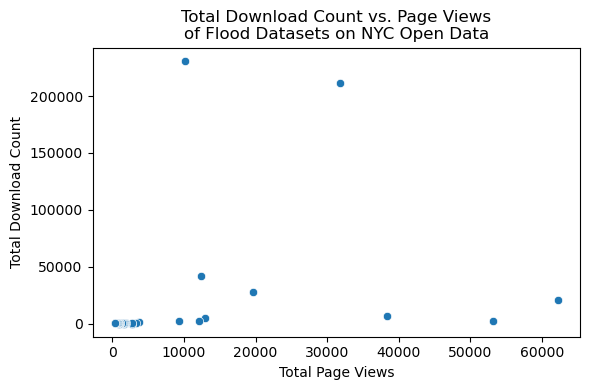

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['page_views_total'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Download Count vs. Page Views\nof Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views')
plt.ylabel('Total Download Count')

plt.tight_layout()

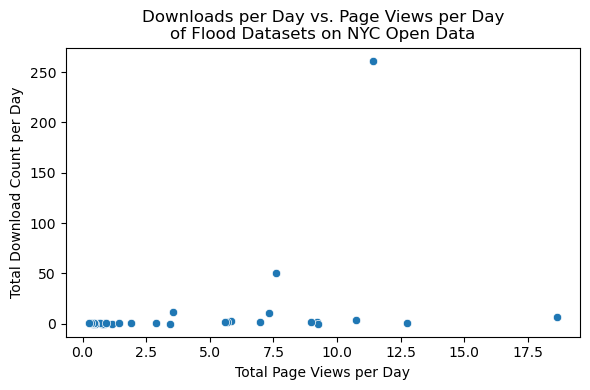

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['download_per_day'],
    ax=ax
)

plt.title('Downloads per Day vs. Page Views per Day\nof Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Download Count per Day')

plt.tight_layout()

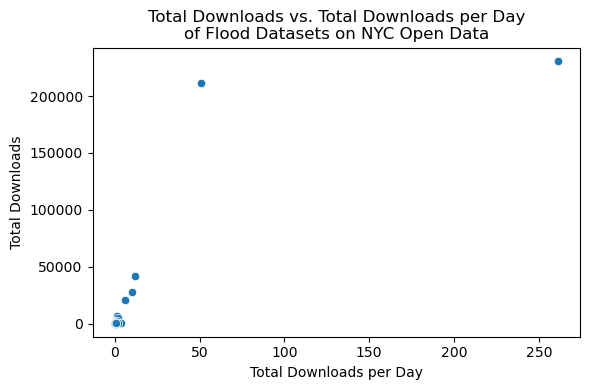

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['download_per_day'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Downloads vs. Total Downloads per Day\nof Flood Datasets on NYC Open Data')
plt.xlabel('Total Downloads per Day')
plt.ylabel('Total Downloads')

plt.tight_layout()

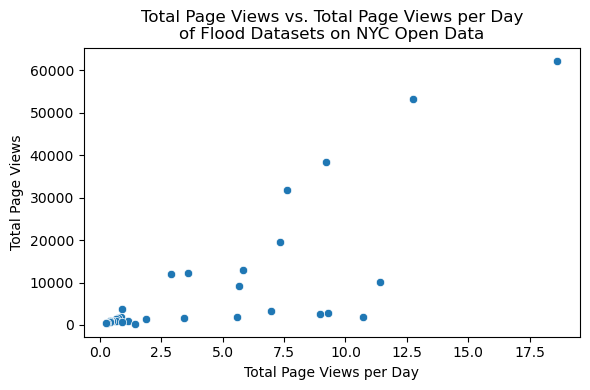

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['page_views_total'],
    ax=ax
)

plt.title('Total Page Views vs. Total Page Views per Day\nof Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Page Views')

plt.tight_layout()